In [37]:
import pandas as pd
import numpy as np

df = pd.DataFrame(['A+', 'A', 'A', 'B+', 'B', 'B', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'],
                 )
df.rename(columns={0: 'Grades'}, inplace=True)
df['Score']=[78,98,77,99,89,84,92,90,65,98,80]
df

,Grades,Score
excellent,A+,78
excellent,A,98
excellent,A,77
good,B+,99
good,B,89
good,B,84
ok,C+,92
ok,C,90
ok,C-,65
poor,D+,98


In [38]:
grades = df.Grades.astype('category')
df.Score.astype('float')

excellent    78.0
excellent    98.0
excellent    77.0
good         99.0
good         89.0
good         84.0
ok           92.0
ok           90.0
ok           65.0
poor         98.0
poor         80.0
Name: Score, dtype: float64

In [39]:
pd.cut(df['Score'],3)

excellent    (76.333, 87.667]
excellent      (87.667, 99.0]
excellent    (76.333, 87.667]
good           (87.667, 99.0]
good           (87.667, 99.0]
good         (76.333, 87.667]
ok             (87.667, 99.0]
ok             (87.667, 99.0]
ok           (64.966, 76.333]
poor           (87.667, 99.0]
poor         (76.333, 87.667]
Name: Score, dtype: category
Categories (3, interval[float64]): [(64.966, 76.333] < (76.333, 87.667] < (87.667, 99.0]]

In [40]:
pd.cut(df['Score'], bins=3,labels=['Dumb','Avg','Smart'])

excellent      Avg
excellent    Smart
excellent      Avg
good         Smart
good         Smart
good           Avg
ok           Smart
ok           Smart
ok            Dumb
poor         Smart
poor           Avg
Name: Score, dtype: category
Categories (3, object): [Dumb < Avg < Smart]

In [41]:
df[df.Grades > 'C']

,Grades,Score
ok,C+,92
ok,C-,65
poor,D+,98
poor,D,80


## Pivot tables

In [42]:
#note A and B have been aggregated!
df.reset_index()\
    .pivot_table(values='Score', index =['Grades'], aggfunc = np.average)

,Score
Grades,
A,87.5
A+,78.0
B,86.5
B+,99.0
C,90.0
C+,92.0
C-,65.0
D,80.0
D+,98.0


## Date Funcitonality

In [93]:
#timestamp datatype
print(pd.Timestamp('7/1/2020 23:01')) 
print(pd.Timestamp('07-01-2020 10:00PM'))
print(pd.Timestamp('1st July 2020 3AM'))
pd.Timestamp('01/2020')

2020-07-01 23:01:00
2020-07-01 22:00:00
2020-07-01 03:00:00


Timestamp('2020-01-01 00:00:00')

In [53]:
#period
pd.Period('1/2020')

Period('2020-01', 'M')

In [55]:
#datetimeindex
date_series = pd.Series(list('aabbccdd'),\
                       [pd.Timestamp('2nd July 2020 2:00am')]*8)
date_series
#this operation can be done on Period datatype as well

2020-07-02 02:00:00    a
2020-07-02 02:00:00    a
2020-07-02 02:00:00    b
2020-07-02 02:00:00    b
2020-07-02 02:00:00    c
2020-07-02 02:00:00    c
2020-07-02 02:00:00    d
2020-07-02 02:00:00    d
dtype: object

### Converting to datetime

In [56]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,93,64
"Aug 29, 2014",64,54
2015-06-26,33,98
7/12/16,71,16


In [59]:
ts3.index = pd.to_datetime(ts3.index)
ts3


,a,b
2013-06-02,93,64
2014-08-29,64,54
2015-06-26,33,98
2016-07-12,71,16


### time deltas - difference in dates and times

In [60]:
pd.Timestamp('2nd June 2020') - pd.Timestamp('7th June 2020')

Timedelta('-5 days +00:00:00')

In [65]:
pd.Timestamp('02/01/2020')+pd.Timedelta('9D 10H 3M')

Timestamp('2020-02-10 10:03:00')

### Date range

In [74]:
data = pd.date_range('10/01/2020', periods=10)
data_fri = pd.date_range('10/01/2020', periods=10, freq = '2W-FRI')
data

DatetimeIndex(['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08',
               '2020-10-09', '2020-10-10'],
              dtype='datetime64[ns]', freq='D')

In [75]:
data.weekday_name

Index(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday'],
      dtype='object')

In [76]:
data_fri.weekday_name

Index(['Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
       'Friday', 'Friday', 'Friday'],
      dtype='object')

In [82]:
df = pd.DataFrame( [2,3,4,5,6,7,8,9,10,11],
                  index =data_fri)
df.rename(columns ={0:'Miles'}, inplace=True)
df

,Miles
2020-10-02,2
2020-10-16,3
2020-10-30,4
2020-11-13,5
2020-11-27,6
2020-12-11,7
2020-12-25,8
2021-01-08,9
2021-01-22,10
2021-02-05,11


In [86]:
df.resample('M').mean()

,Miles
2020-10-31,3.0
2020-11-30,5.5
2020-12-31,7.5
2021-01-31,9.5
2021-02-28,11.0


In [87]:
df['2021']

,Miles
2021-01-08,9
2021-01-22,10
2021-02-05,11


In [89]:
df['2020-12':]

,Miles
2020-12-11,7
2020-12-25,8
2021-01-08,9
2021-01-22,10
2021-02-05,11


In [91]:
df.asfreq('W', method ='ffill')

,Miles
2020-10-04,2
2020-10-11,2
2020-10-18,3
2020-10-25,3
2020-11-01,4
2020-11-08,4
2020-11-15,5
2020-11-22,5
2020-11-29,6
2020-12-06,6


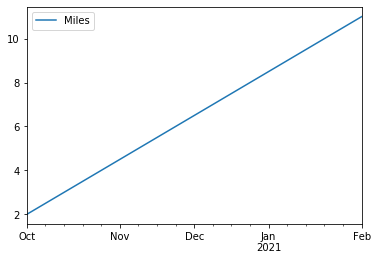

In [92]:
import matplotlib.pyplot as plt

df.plot()